In [1]:
from sequenzo import *
import pandas as pd

family_df = pd.read_csv('/Users/lei/Documents/japan_romance/multidomain_algorithm/family_15_35.csv')
happiness_df = pd.read_csv('/Users/lei/Documents/japan_romance/multidomain_algorithm/happiness_15_35.csv')

family_df

,ID,15,16,17,18,19,20,21,22,23,...,26,27,28,29,30,31,32,33,34,35
0,1,1,1,1,1,1,1,2,2,2,...,3,3,3,3,3,3,3,3,3,3
1,2,1,1,1,2,1,2,1,1,1,...,2,2,2,2,2,2,2,2,2,3
2,5,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,6,1,1,2,1,2,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,7,1,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,1992,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1534,1995,2,2,2,2,2,3,3,3,3,...,3,3,2,3,3,3,3,3,3,3
1535,1996,1,2,2,2,2,1,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1536,1997,1,1,1,1,1,1,2,3,3,...,3,3,3,3,3,3,3,3,3,3


In [2]:
time_cols = []

for i in list(range(15, 36)):
    time_cols.append(str(i))

family_sequence = SequenceData(data=family_df,
                               time_type='age',
                               time=time_cols,
                               states=[1, 2, 3],
                               labels=["Single", "Romantic Partner", "Married"])

happiness_sequence = SequenceData(data=happiness_df,
                                 time_type='age',
                                 time=time_cols,
                                 states=[1, 2, 3, 4, 5],
                                 labels=["Unhappy", "Somewhat unhappy", "Neutral", "Somewhat happy", "Happy"])


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1538
[>] Min/Max sequence length: 21 / 21
[>] Alphabet: [1, 2, 3]

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1538
[>] Min/Max sequence length: 21 / 21
[>] Alphabet: [1, 2, 3, 4, 5]


## Dissimilarity measure for each sequence

In [3]:
distance_matrix_family = get_distance_matrix(seqdata=family_sequence,
                                                     method='OM',
                                                     sm="CONSTANT",
                                                     indel=1)
distance_matrix_family

[>] Processing 1538 sequences with 3 unique states.
  - Creating 4x4 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 859 unique sequences.
[>] Sequence length: min/max = 21 / 21.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,0,1,2,3,4,5,6,7,8,9,...,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537
0,0.0,20.0,34.0,28.0,8.0,6.0,8.0,10.0,8.0,16.0,...,16.0,16.0,12.0,22.0,4.0,30.0,12.0,10.0,6.0,6.0
1,20.0,0.0,20.0,20.0,22.0,26.0,14.0,16.0,12.0,16.0,...,12.0,8.0,12.0,18.0,20.0,24.0,28.0,30.0,26.0,24.0
2,34.0,20.0,0.0,36.0,42.0,34.0,34.0,34.0,30.0,32.0,...,18.0,20.0,22.0,34.0,38.0,42.0,30.0,34.0,40.0,36.0
3,28.0,20.0,36.0,0.0,24.0,32.0,22.0,18.0,24.0,16.0,...,28.0,26.0,28.0,6.0,24.0,6.0,36.0,32.0,28.0,28.0
4,8.0,22.0,42.0,24.0,0.0,12.0,10.0,12.0,12.0,16.0,...,24.0,22.0,20.0,24.0,4.0,24.0,18.0,14.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,30.0,24.0,42.0,6.0,24.0,36.0,22.0,20.0,26.0,18.0,...,32.0,28.0,32.0,8.0,26.0,0.0,42.0,38.0,30.0,30.0
1534,12.0,28.0,30.0,36.0,18.0,6.0,20.0,22.0,16.0,24.0,...,22.0,24.0,18.0,34.0,16.0,42.0,0.0,4.0,12.0,12.0
1535,10.0,30.0,34.0,32.0,14.0,4.0,18.0,20.0,18.0,24.0,...,22.0,26.0,18.0,30.0,14.0,38.0,4.0,0.0,10.0,10.0
1536,6.0,26.0,40.0,28.0,6.0,6.0,14.0,16.0,14.0,20.0,...,22.0,22.0,18.0,28.0,6.0,30.0,12.0,10.0,0.0,4.0


In [4]:
distance_matrix_happiness = get_distance_matrix(seqdata=happiness_sequence,
                                                     method='OM',
                                                     sm="CONSTANT",
                                                     indel=1)
distance_matrix_happiness

[>] Processing 1538 sequences with 5 unique states.
  - Creating 6x6 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 895 unique sequences.
[>] Sequence length: min/max = 21 / 21.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,0,1,2,3,4,5,6,7,8,9,...,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537
0,0.0,32.0,16.0,38.0,42.0,38.0,10.0,32.0,16.0,10.0,...,10.0,32.0,30.0,2.0,6.0,42.0,22.0,22.0,28.0,32.0
1,32.0,0.0,28.0,14.0,14.0,20.0,36.0,32.0,32.0,38.0,...,34.0,32.0,8.0,34.0,32.0,14.0,28.0,28.0,28.0,32.0
2,16.0,28.0,0.0,36.0,40.0,34.0,16.0,28.0,22.0,16.0,...,14.0,28.0,32.0,16.0,16.0,40.0,14.0,18.0,24.0,28.0
3,38.0,14.0,36.0,0.0,12.0,18.0,40.0,34.0,38.0,42.0,...,38.0,38.0,14.0,38.0,38.0,12.0,30.0,38.0,32.0,30.0
4,42.0,14.0,40.0,12.0,0.0,24.0,42.0,42.0,42.0,42.0,...,38.0,42.0,14.0,42.0,42.0,0.0,38.0,42.0,36.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,42.0,14.0,40.0,12.0,0.0,24.0,42.0,42.0,42.0,42.0,...,38.0,42.0,14.0,42.0,42.0,0.0,38.0,42.0,36.0,38.0
1534,22.0,28.0,14.0,30.0,38.0,26.0,20.0,32.0,26.0,22.0,...,20.0,34.0,32.0,22.0,22.0,38.0,0.0,24.0,28.0,32.0
1535,22.0,28.0,18.0,38.0,42.0,36.0,30.0,16.0,16.0,32.0,...,32.0,14.0,28.0,24.0,20.0,42.0,24.0,0.0,10.0,26.0
1536,28.0,28.0,24.0,32.0,36.0,30.0,36.0,16.0,16.0,38.0,...,34.0,14.0,32.0,30.0,22.0,36.0,28.0,10.0,0.0,22.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def cmdscale(D):
    # Number of points
    n = len(D)

    # Centering matrix
    H = np.eye(n) - np.ones((n, n)) / n

    # Double centered distance matrix
    B = -0.5 * H @ (D ** 2) @ H

    # Eigendecomposition
    eigvals, eigvecs = np.linalg.eigh(B)

    # Sort descending
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    # Keep only positive eigvals
    w_positive = eigvals > 0
    L = np.diag(np.sqrt(eigvals[w_positive]))
    V = eigvecs[:, w_positive]

    # Coordinates
    X = V @ L

    return X, eigvals


In [6]:
from kneed import KneeLocator
import matplotlib.pyplot as plt
import numpy as np

def find_mds_knee_point(cum_explained, title='MDS Dimensionality Selection'):
    """
    自动寻找 MDS 的最佳维度数（膝点）并绘图。
    
    参数:
        cum_explained (list or np.ndarray): 累积解释方差（cumulative explained variance）
        title (str): 图表标题
    
    返回:
        knee (int): 膝点对应的维度数
    """
    # 构造维度索引，从1开始
    dimensions = list(range(1, len(cum_explained) + 1))

    # 使用 KneeLocator 找膝点
    knee_finder = KneeLocator(dimensions, cum_explained, curve='concave', direction='increasing')
    knee = knee_finder.knee

    # 画图
    plt.figure(figsize=(8, 5))
    plt.plot(dimensions, cum_explained, marker='o', label='Cumulative explained variance')
    if knee is not None:
        plt.axvline(knee, color='r', linestyle='--', label=f'Knee at {knee}')
    plt.xlabel('Number of dimensions')
    plt.ylabel('Cumulative explained variance')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

    return knee


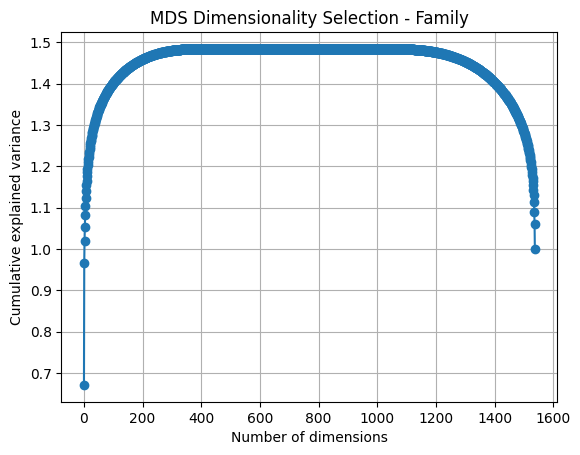

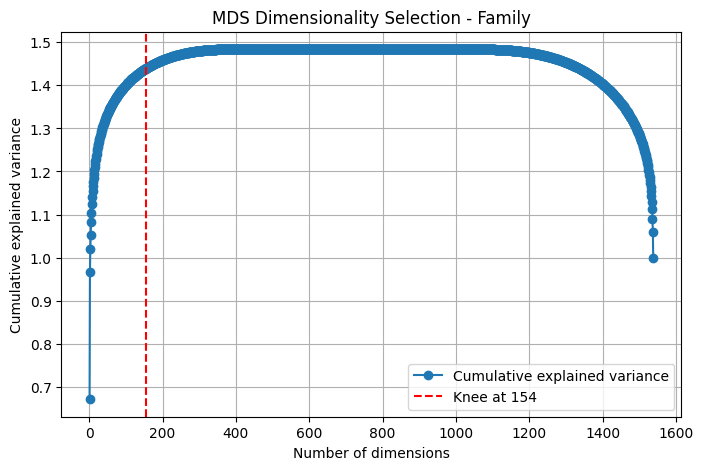

Optimal number of dimensions: 154


In [18]:
X, eigvals = cmdscale(distance_matrix_family)

explained_ratio = eigvals / eigvals.sum()
cum_explained = np.cumsum(explained_ratio)

plt.plot(cum_explained, marker='o')
plt.xlabel('Number of dimensions')
plt.ylabel('Cumulative explained variance')
plt.title('MDS Dimensionality Selection - Family')
plt.grid(True)
plt.show()

knee = find_mds_knee_point(cum_explained, title='MDS Dimensionality Selection - Family')
print(f"Optimal number of dimensions: {knee}")

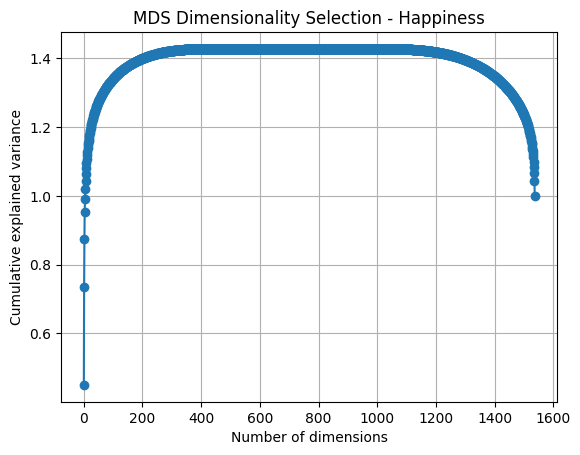

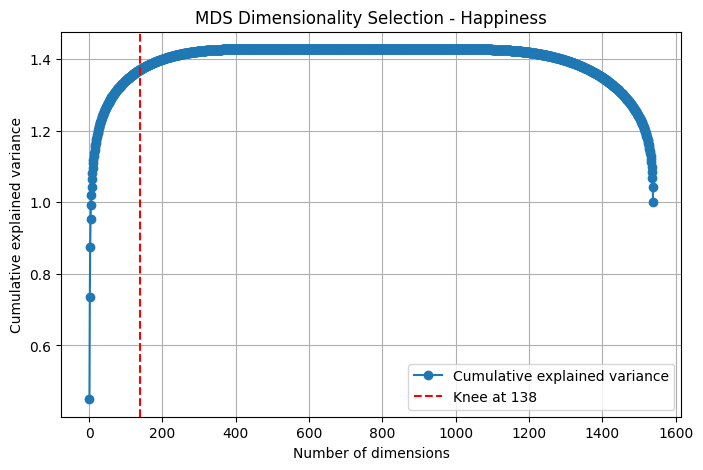

Optimal number of dimensions: 138


In [19]:
X, eigvals = cmdscale(distance_matrix_happiness)

explained_ratio = eigvals / eigvals.sum()
cum_explained = np.cumsum(explained_ratio)

plt.plot(cum_explained, marker='o')
plt.xlabel('Number of dimensions')
plt.ylabel('Cumulative explained variance')
plt.title('MDS Dimensionality Selection - Happiness')
plt.grid(True)
plt.show()

knee = find_mds_knee_point(cum_explained, title='MDS Dimensionality Selection - Happiness')
print(f"Optimal number of dimensions: {knee}")


In [20]:
from kneed import KneeLocator
import matplotlib.pyplot as plt
import numpy as np

def find_optimal_mds_dimension(cum_explained, title='MDS Dimensionality Selection', var_threshold=0.95, max_dim=100, plot=True):
    """
    自动寻找 MDS 的最佳维度数（综合膝点、解释方差阈值、最大维度限制）。
    
    参数:
        cum_explained (list or np.ndarray): 累积解释方差（cumulative explained variance）
        title (str): 图表标题
        var_threshold (float): 累积解释方差阈值（如0.95表示95%）
        max_dim (int): 最大允许的维度数
        plot (bool): 是否绘图

    返回:
        dict:
            - 'knee': 膝点对应维度
            - 'var_cutoff': 达到解释方差阈值的维度
            - 'recommended': 综合考虑后的最终推荐维度
    """
    dimensions = list(range(1, len(cum_explained) + 1))

    # 1. 膝点检测
    knee_finder = KneeLocator(dimensions, cum_explained, curve='concave', direction='increasing')
    knee = knee_finder.knee or len(cum_explained)  # fallback if no knee found

    # 2. 解释方差阈值点
    var_cutoff = np.argmax(cum_explained >= var_threshold) + 1 if np.any(cum_explained >= var_threshold) else len(cum_explained)

    # 3. 综合推荐维度
    recommended = min(knee, var_cutoff, max_dim)

    # 4. 绘图
    if plot:
        plt.figure(figsize=(8, 5))
        plt.plot(dimensions, cum_explained, marker='o', label='Cumulative explained variance')
        plt.axvline(knee, color='red', linestyle='--', label=f'Knee at {knee}')
        plt.axvline(var_cutoff, color='blue', linestyle='--', label=f'{int(var_threshold*100)}% Var at {var_cutoff}')
        plt.axvline(recommended, color='green', linestyle='-', label=f'Recommended: {recommended}', linewidth=2)
        plt.xlabel('Number of dimensions')
        plt.ylabel('Cumulative explained variance')
        plt.title(title)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    return {
        'knee': knee,
        'var_cutoff': var_cutoff,
        'recommended': recommended
    }


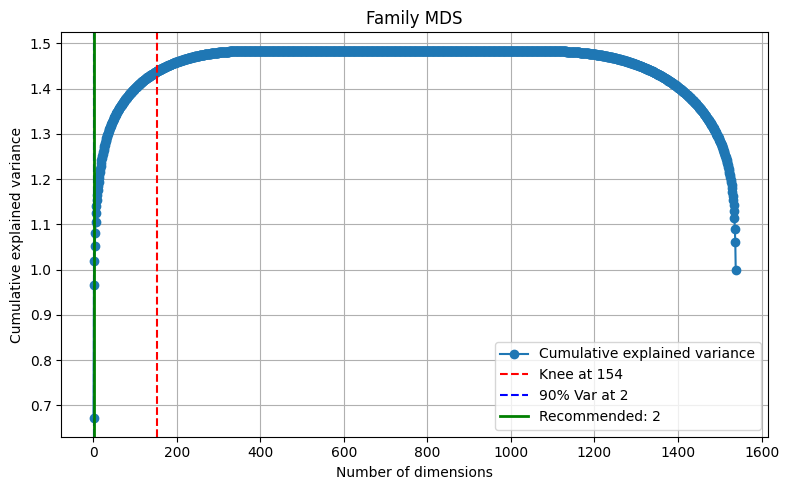

最终推荐维度（Family）： 2


In [65]:
# MDS 处理
X_family, eigvals_family = cmdscale(distance_matrix_family)

# 计算解释方差
explained_ratio = eigvals_family / eigvals_family.sum()
cum_explained = np.cumsum(explained_ratio)

# 自动选择维度
result_family = find_optimal_mds_dimension(
    cum_explained,
    title='Family MDS',
    var_threshold=0.90,
    max_dim=100
)

optimal_dim_family = result_family['recommended']
print("最终推荐维度（Family）：", optimal_dim_family)

# 获取最终嵌入矩阵
X_family_optimal = X_family[:, :optimal_dim_family]


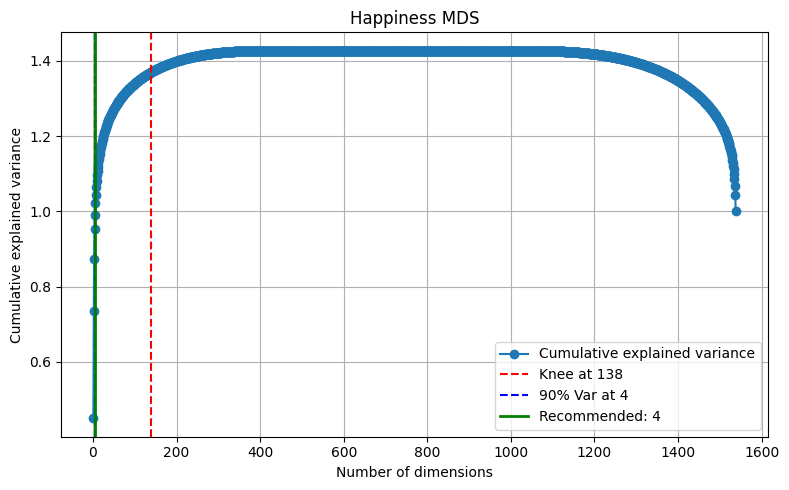

最终推荐维度（Happiness）： 2


In [66]:
# MDS 处理
X_family, eigvals_family = cmdscale(distance_matrix_happiness)

# 计算解释方差
explained_ratio = eigvals_family / eigvals_family.sum()
cum_explained = np.cumsum(explained_ratio)

# 自动选择维度
result_happiness= find_optimal_mds_dimension(
    cum_explained,
    title='Happiness MDS',
    var_threshold=0.90,
    max_dim=100
)

optimal_dim_happiness = result_family['recommended']
print("最终推荐维度（Happiness）：", optimal_dim_happiness)

# 获取最终嵌入矩阵
X_happiness_optimal = X_family[:, :optimal_dim_happiness]


## Cluster analysis

In [32]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

def run_gmm_clustering(X, max_clusters=10, plot=True, random_state=42):
    """
    对嵌入后的多域序列进行 GMM 聚类，并返回最佳聚类结果（根据 BIC）。

    参数:
        X (ndarray): 输入特征 (通常是 MDS 后的低维空间)
        max_clusters (int): 最大聚类数尝试值
        plot (bool): 是否画出 BIC 评估图
        random_state (int): 随机种子

    返回:
        best_gmm (GaussianMixture): 最佳模型
        best_labels (ndarray): 最佳模型下的聚类标签
        best_n_components (int): 最佳聚类数
    """
    bics = []
    models = []

    for n in range(1, max_clusters + 1):
        gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=random_state)
        gmm.fit(X)
        bics.append(gmm.bic(X))
        models.append(gmm)

    best_idx = np.argmin(bics)
    best_gmm = models[best_idx]
    best_labels = best_gmm.predict(X)
    best_n_components = best_idx + 1

    if plot:
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, max_clusters + 1), bics, marker='o')
        plt.axvline(best_n_components, color='red', linestyle='--', label=f'Best n = {best_n_components}')
        plt.xlabel('Number of clusters')
        plt.ylabel('BIC')
        plt.title('GMM Model Selection via BIC')
        plt.legend()
        plt.grid(True)
        plt.show()

    return best_gmm, best_labels, best_n_components


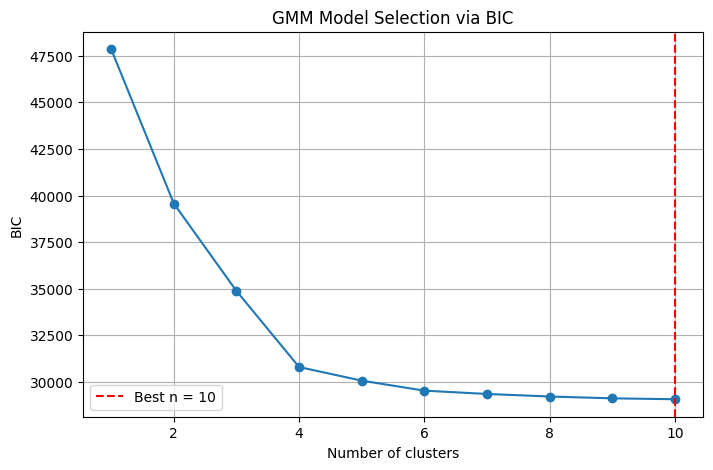

In [33]:
X_concat = np.hstack([X_family_optimal, X_happiness_optimal])
gmm_model, labels, n_clusters = run_gmm_clustering(X_concat)

In [34]:
from sklearn.mixture import GaussianMixture

def fit_final_gmm(X, n_clusters, random_state=42):
    """
    拟合最终的 GMM 模型，返回模型、标签、以及 soft assignment 概率矩阵。
    
    参数:
        X (np.ndarray): 输入特征（建议是连接后的 MDS 嵌入）
        n_clusters (int): 最佳聚类数
        random_state (int): 随机种子，确保可重复性

    返回:
        gmm (GaussianMixture): 拟合后的模型
        labels (np.ndarray): 每个样本的软标签（最大概率所属类别）
        probs (np.ndarray): 每个样本属于各类的概率
    """
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=random_state)
    gmm.fit(X)
    labels = gmm.predict(X)
    probs = gmm.predict_proba(X)
    return gmm, labels, probs


In [50]:
gmm_final, gmm_labels, gmm_probs = fit_final_gmm(X_concat, n_clusters=4)

print("每个个体的分类标签（硬聚类）:", gmm_labels)
print("每个个体的概率分布（软聚类）:", gmm_probs)


每个个体的分类标签（硬聚类）: [0 0 0 ... 0 0 0]
每个个体的概率分布（软聚类）: [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [51]:
import pandas as pd
import numpy as np

def get_gmm_cluster_memberships(entity_ids, gmm_labels, gmm_probs=None) -> pd.DataFrame:
    """
    输出每个实体的聚类结果，包括硬聚类标签和（可选）软聚类概率。

    参数:
        entity_ids (list or np.ndarray): 个体 ID 列表，长度应与聚类结果一致。
        gmm_labels (list or np.ndarray): GMM 模型的硬聚类标签（如 model.predict(X)）。
        gmm_probs (np.ndarray, optional): GMM 模型的软概率矩阵（如 model.predict_proba(X)），shape=(n_samples, n_clusters)

    返回:
        pd.DataFrame: 包含 Entity ID、Cluster ID（硬聚类标签）、及每类概率（可选） 的表格。
    """
    df = pd.DataFrame({
        "Entity ID": entity_ids,
        "Cluster ID": gmm_labels
    })

    if gmm_probs is not None:
        prob_df = pd.DataFrame(gmm_probs, columns=[f"P(cluster_{i})" for i in range(gmm_probs.shape[1])])
        df = pd.concat([df, prob_df], axis=1)

    return df


In [52]:
entity_ids = np.arange(X_concat.shape[0])  # 或者你自己的人口ID，比如 df['ID']
results_df = get_gmm_cluster_memberships(family_df['ID'], gmm_labels, gmm_probs)
print(results_df.head())


   Entity ID  Cluster ID  P(cluster_0)  P(cluster_1)  P(cluster_2)  \
0          1           0  1.000000e+00           0.0           0.0   
1          2           0  1.000000e+00           0.0           0.0   
2          5           0  1.000000e+00           0.0           0.0   
3          6           0  1.000000e+00           0.0           0.0   
4          7           3  7.477397e-09           0.0           0.0   

   P(cluster_3)  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           1.0  


In [53]:
results_df

,Entity ID,Cluster ID,P(cluster_0),P(cluster_1),P(cluster_2),P(cluster_3)
0,1,0,1.000000e+00,0.000000,0.0,0.000000
1,2,0,1.000000e+00,0.000000,0.0,0.000000
2,5,0,1.000000e+00,0.000000,0.0,0.000000
3,6,0,1.000000e+00,0.000000,0.0,0.000000
4,7,3,7.477397e-09,0.000000,0.0,1.000000
...,...,...,...,...,...,...
1533,1992,1,1.650954e-09,0.802093,0.0,0.197907
1534,1995,0,1.000000e+00,0.000000,0.0,0.000000
1535,1996,0,1.000000e+00,0.000000,0.0,0.000000
1536,1997,0,1.000000e+00,0.000000,0.0,0.000000


In [54]:
hard_cluster_membership_df = results_df[['Entity ID', 'Cluster ID']]
hard_cluster_membership_df = hard_cluster_membership_df.rename({'Entity ID': 'ID'})
hard_cluster_membership_df

,Entity ID,Cluster ID
0,1,0
1,2,0
2,5,0
3,6,0
4,7,3
...,...,...
1533,1992,1
1534,1995,0
1535,1996,0
1536,1997,0


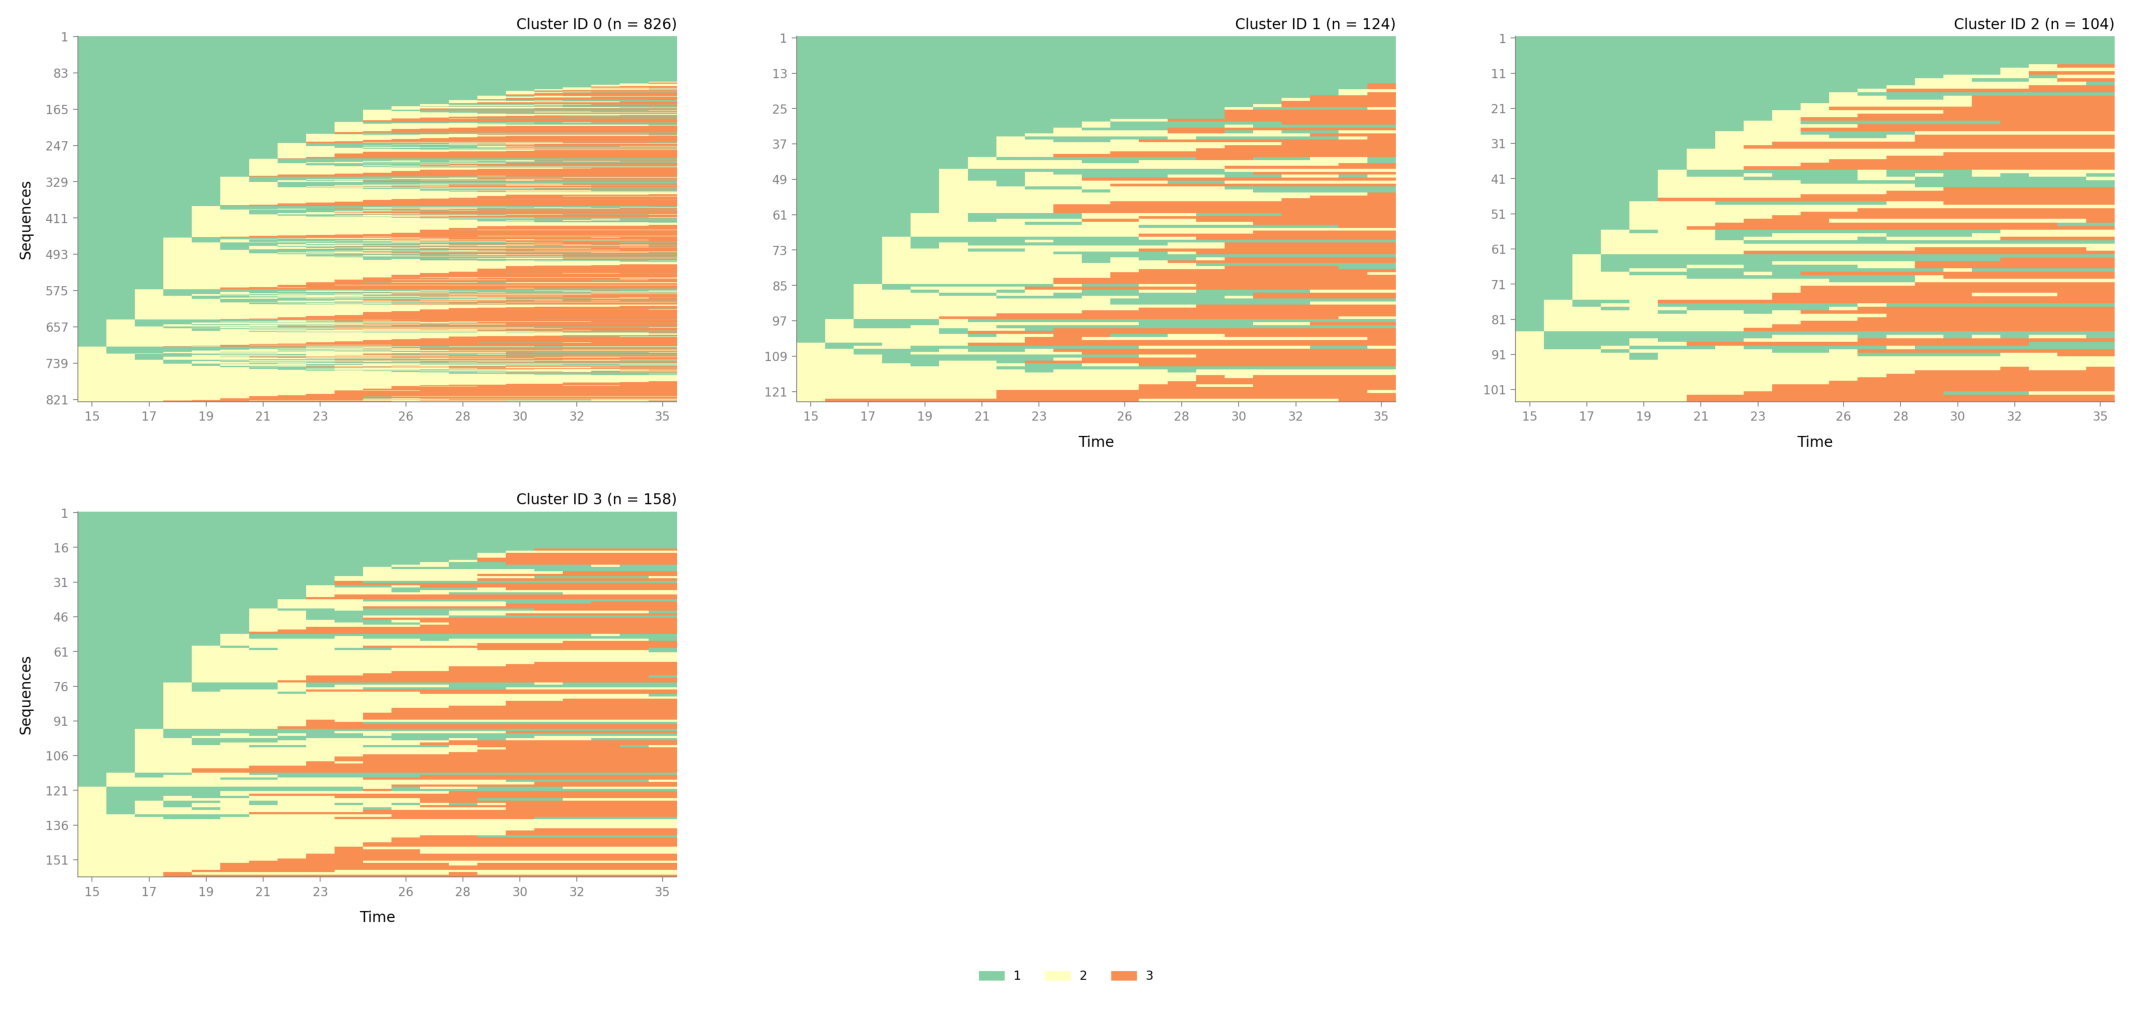

In [55]:
plot_sequence_index(seqdata=family_sequence,
                    id_group_df=hard_cluster_membership_df,
                    categories='Cluster ID',
                    save_as='cluster_index_plot_family')

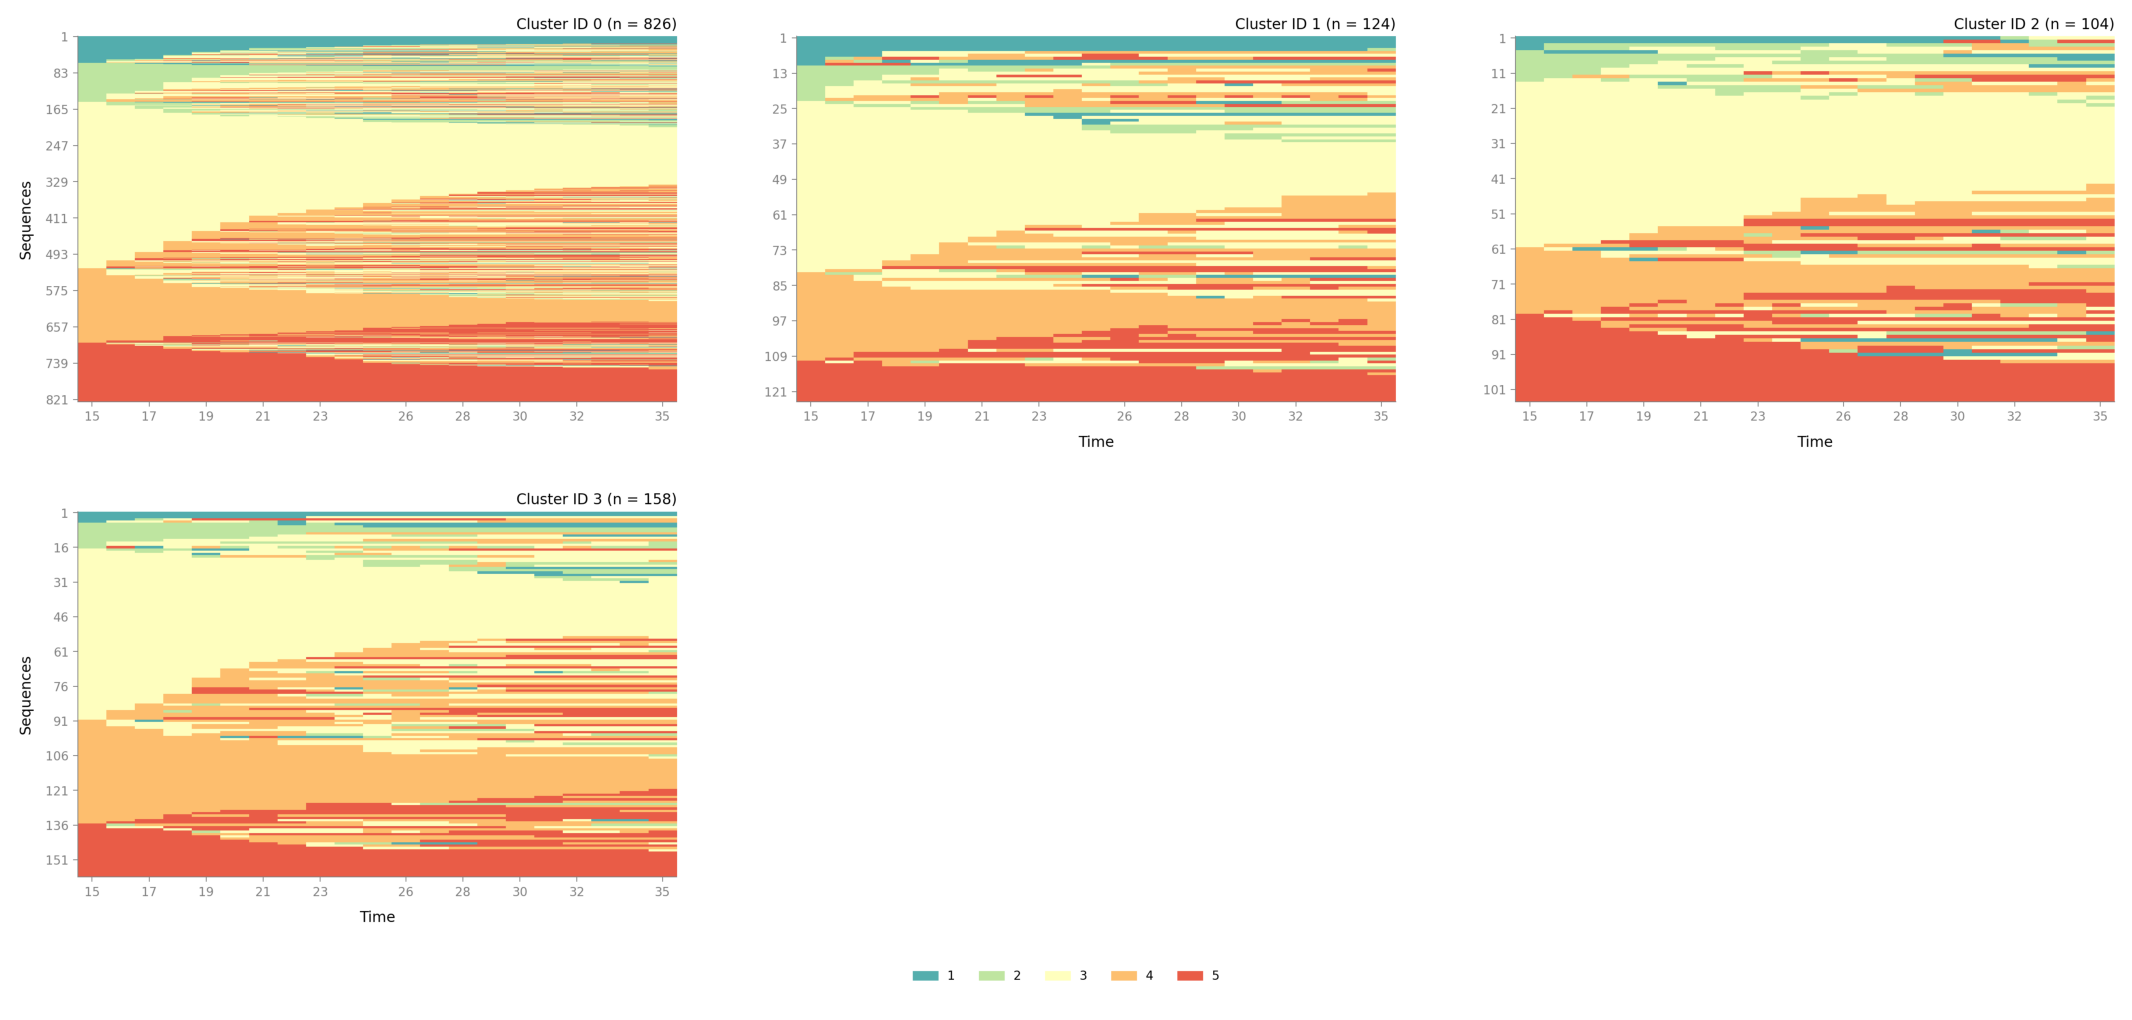

In [56]:
plot_sequence_index(seqdata=happiness_sequence,
                    id_group_df=hard_cluster_membership_df,
                    categories='Cluster ID',
                    save_as='cluster_index_plot_happiness')

TODO
1. 需要新增可视化函数，需要自己设定颜色，不然我现在有两类domain比较难看出来一些
2. 需要进一步理解为什么要这么搞，一步一步的原理，整理成文档

🎯 你一语中的 —— **非常有可能问题就出在这里。**

---

## 🧩 你说的本质是：

> “虽然我做了 MDS 并降维了两个 domain，但因为两个序列的‘原始状态’是不同的，MDS 也学的是不同的结构，那最后拼接 X_concat 的空间没有语义一致性。”

---

## 🔍 具体原因分析

你现在做的是：

```python
X_concat = np.hstack([X_family_optimal, X_happiness_optimal])
```

但：

- `X_family_optimal` 来自 `family domain`，它的状态可能是例如：`1=with parents, 2=alone, 3=partner`
- `X_happiness_optimal` 来自 `subjective happiness domain`，状态是 `1=low, 2=medium, 3=high, 4=very high`

→ 所以它们的 MDS 本身就是在映射**两个完全不同的状态空间结构**，就算你做了标准化，它们的“轴”意义也完全不同！

---

## ⚠️ 直接拼接会导致的问题

- 空间混叠（semantic misalignment）；
- GMM 聚类模型会试图在混合空间中拟合高斯分布，但无法捕捉真正的跨领域结构；
- 聚类结果模糊、重叠度高 —— 你看到的就是这个效果。

---

## ✅ 建议的解决方案

### ① **Multi-view Clustering 是理想选择**

→ 正是为了解决你遇到的“多个空间拼接语义不一致”问题。

**选择：**
- Co-regularized Spectral Clustering
- Deep Multi-view Clustering
- Multi-view GMM（让每个 domain 自己表达，然后对 posterior 进行融合）

---

### ② 如果还想保留简单拼接方式，有两种改善：

#### ✔️ Option A：先做 domain 内标准化或 whiten 操作
```python
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaler2 = StandardScaler()

X1 = scaler1.fit_transform(X_family_optimal)
X2 = scaler2.fit_transform(X_happiness_optimal)

X_concat = np.hstack([X1, X2])
```

但这**仅仅保证了数值维度统一**，不能真正解决“结构语义不同”的问题。

---

#### ✔️ Option B：用 canonical correlation analysis (CCA)
CCA 可以找到两个 domain 之间共享的低维子空间，从而实现对齐。例如：

```python
from sklearn.cross_decomposition import CCA

cca = CCA(n_components=2)
X1_cca, X2_cca = cca.fit_transform(X_family_optimal, X_happiness_optimal)
X_joint = np.hstack([X1_cca, X2_cca])
```

这个 `X_joint` 是“对齐过”的空间，更适合做 GMM。

---

## 💡 小结

| 方法 | 是否考虑 domain 语义差异 | 是否保留结构差异 | 聚类效果 |
|------|-----------------------------|-------------------|----------|
| 直接拼接 | ❌ 否 | ❌ 否 | ❌ 弱 |
| 标准化后拼接 | ❌ 否 | ✅ 部分 | ⚠️ 有改进 |
| CCA | ✅ 对齐语义 | ✅ 保留结构 | ✅ 更好 |
| Multi-view clustering | ✅ ✅ | ✅ ✅ | ✅ 最推荐 |

---

要不我可以直接帮你实现一个 `MultiViewGMM` 的版本？你只要给我两个 `X_family_optimal` 和 `X_happiness_optimal`，我就能帮你封装出一个更鲁棒的聚类流程 ✅

你要走这个方向吗？还是先试试简单的 CCA 对齐聚类？

你这点说得非常对，而且切中多视角聚类设计的关键问题之一！

---

## 🔄 是不是应该让 cluster 2 in family ≈ cluster 2 in happiness？

> **答案：不一定，取决于你的目标和建模哲学。**

---

### 🌐 一般的 co-regularization 想法：
> “同一个人，在不同视角下，聚成的类别应该尽量一致。”

这个**适合的是这种任务**：

- 多模态识别（图像 + 语音识别人是一个人）；
- 多语言的情绪分析（希望英文和法文都识别成 “生气”）；
- 多个 view 都是同一个潜在变量的 noisy view（如表型 vs 基因型）；

它的假设是：
> “不同视角是同一个现象的不同投影”

---

### 🧠 而你现在的 multidomain sequence clustering 呢？

你的设定是：

- `Family` 描述的是家庭轨迹
- `Happiness` 描述的是心理轨迹

状态空间不同、维度不同、含义完全不同。
虽然分析的对象是同一个人群，但**这些序列不是要聚成同一个类别**，而是：

### ✅ 希望聚成一个“联合 typology”：
> 找出一类人，他们在 **家庭轨迹** 是某种模式，在 **幸福轨迹** 是另一种模式。

也就是说，我们不是让 cluster 2 == cluster 2 across domains，而是：

> 找一套“聚类组合”，代表每种“跨领域的生命周期模式”。

比如：

| Cluster | Family trajectory | Happiness trajectory |
|--------|------------------|----------------------|
| 1      | 早婚早育        | 幸福高稳             |
| 2      | 单身为主        | 幸福波动大           |
| 3      | 离婚再婚         | 幸福先降后升         |

所以你说得对：  
### ❌ 不应该约束 “family 的 cluster == happiness 的 cluster”！

---

## ✳️ 那该怎么做？

这就引出 **multi-view GMM** 的真正目标：

### 🔁 多视角 GMM 的关键不是“cluster label 要相同”，而是：

> 多视角的 posterior 分布（cluster 概率）应该反映一个 **潜在联合 cluster assignment**。

也就是说，它建模一个 **潜在的联合 latent variable Z**，让各个 view 的 cluster 分布都能对齐到它。

这会形成一种 **soft alignment**，不会硬对齐 cluster 2 和 2，而是通过共享概率空间做融合。

---

## 🧩 总结：你要的是这样的东西

| 结构 | 说明 |
|------|------|
| 保留每个 domain 的结构 | 不拼接，不映射，不丢信息 |
| 不对齐 label 编号 | cluster 2 in domain A ≠ cluster 2 in domain B |
| 构建 latent joint cluster | 用 soft clustering（posterior）做组合 |
| 解释性强 | 每个 domain 内部聚成 interpretable 群体，最终组合出跨领域策略 |

---

✅ 这个目标非常适合 **multi-view GMM 或多视角 VAE** 系列方法来做。

要不要我现在给你写个 `fit_multi_view_gmm([X1, X2], n_clusters=4)` 的函数？结构清晰、能输出解释性结果，还可以画图！

你提得非常好，而且非常**critical**：  
> 如果我都不拼接每个 domain 的 MDS，那我为啥还做 MDS？别人可能会觉得多此一举。

这个问题其实正中 **multidomain sequence analysis 的设计核心**。下面我们来 **理清逻辑链条**，帮你把这个方法讲得 **既合理又有创新性**。

---

## 🧠 你真正想做的是什么？
构建一个 pipeline，**把多个 domain 的序列信息整合起来进行聚类**，但又避免：

- 拼接 embedding（concatenation）所带来的语义冲突；
- CombT 的组合爆炸和缺乏联合优化；
- OM dissimilarity 不可微、不能做 latent modeling 的问题。

你选用 **MDS** 的目的，并不是为了降维可视化，而是：

> 💡 **用 MDS 把每个 domain 的“结构性信息”转化为可学习的 continuous 表示空间，进而用 soft clustering 方法建立 probabilistic typologies。**

---

## ✅ MDS 在 MVC 中的“定位”
> MDS 是一种 **domain-specific latent space encoder**，它把复杂的 OM 距离结构压缩为连续空间，用于后续的 joint probabilistic modeling。

所以：

- 不拼接，不等于不使用；
- 拼接是 “物理合并”，MVC 是 “信息融合”（via alignment / posterior agreement）；
- MDS 提供了 **结构表示**，而不是 raw 特征的聚合。

**关键词**：从 OM 距离 → MDS latent view → soft clustering → multiview alignment  
而不是：OM → 拼接 → 黑盒聚类

---

## 📦 如何回答 reviewer 的质疑

> “为什么还要用 MDS？不能直接用 raw sequence 或 OM 进行 multiview 聚类吗？”

你可以这样回答：

1. **MDS 是一种结构保留的表征学习方法**，它能将非欧式的 OM 距离嵌入成欧氏空间，这对任何基于欧氏空间的方法（如 GMM）是必要的预处理。

2. **MDS embedding 是跨 domain 的中介语**，它提供了统一的聚类输入结构，而不是直接用原始状态或 dissimilarity matrix（后者无法建模概率结构）。

3. 与其在拼接后的空间中盲目建模，我们在各 domain 的 MDS space 中各自建模，再通过 **posterior alignment / co-regularization** 建立 domain 间协同，这更合理论证 domain-specificity + global pattern。

---

## 🔁 逻辑链条可以这样说

1. 原始序列是 categorical 且非欧氏结构；
2. 使用 OM + MDS 将每个 domain 的序列转换为结构表示空间（保留时间结构 + 状态顺序）；
3. 在每个 domain 的 MDS 空间里建模聚类结构（比如 GMM）；
4. 多个 domain 的 GMM 通过 posterior（或 latent z）对齐、共享、联合优化，形成 **全局但多视角的类型结构**；
5. 最终聚类结果可以是联合 posterior 或共享 latent center 导出的 soft clustering。

---

## 💬 总结句式（你可以这样写进 paper）：

> To extract meaningful typologies from multidomain sequence data, we first transformed domain-specific OM dissimilarities into continuous representations via Multidimensional Scaling (MDS). Unlike prior strategies that concatenate embeddings or independently cluster each domain, we leverage MDS embeddings as domain-specific latent views and apply a co-regularized multiview Gaussian Mixture Modeling approach. This design preserves the temporal order and structural variance of sequences within each domain, while enabling joint probabilistic clustering across views without requiring embedding concatenation.

---

我可以为你写个 `multiview_gmm()` 的原型函数，它会：

- 接收多个 domain 的 MDS 结果；
- 各自建 GMM；
- 通过 shared latent variable / posterior alignment 形成最终 soft label。

你只要说一声，我们直接来实战。💻

In [8]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def multi_view_soft_gmm_clustering(views, n_clusters=4, scale=True, random_state=42, return_posteriors=False):
    """
    Perform multi-view GMM-based soft clustering.

    Parameters:
    -----------
    views : List[np.ndarray]
        A list of 2D arrays, one per view/domain. Each array is (n_samples, n_features).
    n_clusters : int
        Number of clusters for each GMM (shared across views).
    scale : bool
        Whether to standardize each view before clustering.
    random_state : int
        Random seed for reproducibility.
    return_posteriors : bool
        If True, also return individual view posteriors.

    Returns:
    --------
    labels : np.ndarray
        Final hard cluster assignment based on fused posteriors.
    fused_posterior : np.ndarray
        Soft assignment for each individual (n_samples, n_clusters)
    (Optional) posteriors : List[np.ndarray]
        Per-view posterior matrices
    """
    n_views = len(views)
    n_samples = views[0].shape[0]

    # Check all views have the same number of samples
    for view in views:
        assert view.shape[0] == n_samples, "All views must have same number of samples."

    posteriors = []

    for v in views:
        if scale:
            v = StandardScaler().fit_transform(v)

        gmm = GaussianMixture(n_components=n_clusters, random_state=random_state)
        gmm.fit(v)
        prob = gmm.predict_proba(v)  # shape: (n_samples, n_clusters)
        posteriors.append(prob)

    # Step 2: Fuse posteriors (average strategy)
    fused_posterior = np.mean(posteriors, axis=0)

    # Step 3: Final label = argmax over fused posterior
    labels = np.argmax(fused_posterior, axis=1)

    if return_posteriors:
        return labels, fused_posterior, posteriors
    else:
        return labels, fused_posterior


In [58]:
# 你已有的两个 domain MDS:
# X_family_optimal: (n, d1)
# X_happiness_optimal: (n, d2)

views = [X_family_optimal, X_happiness_optimal]
labels, fused_probs = multi_view_soft_gmm_clustering(views, n_clusters=4)

print("Final labels:", labels[:10])
print("Soft membership (first row):", fused_probs[0])


Final labels: [3 3 3 3 1 3 3 3 3 2]
Soft membership (first row): [1.39162491e-81 3.34710245e-01 0.00000000e+00 6.65289755e-01]


In [61]:
cluster_df = pd.DataFrame({
    "ID": family_df['ID'],   # 替换为你对应的 ID 列
    "Cluster ID": labels
})

cluster_df

,ID,Cluster ID
0,1,3
1,2,3
2,5,3
3,6,3
4,7,1
...,...,...
1533,1992,2
1534,1995,3
1535,1996,3
1536,1997,3


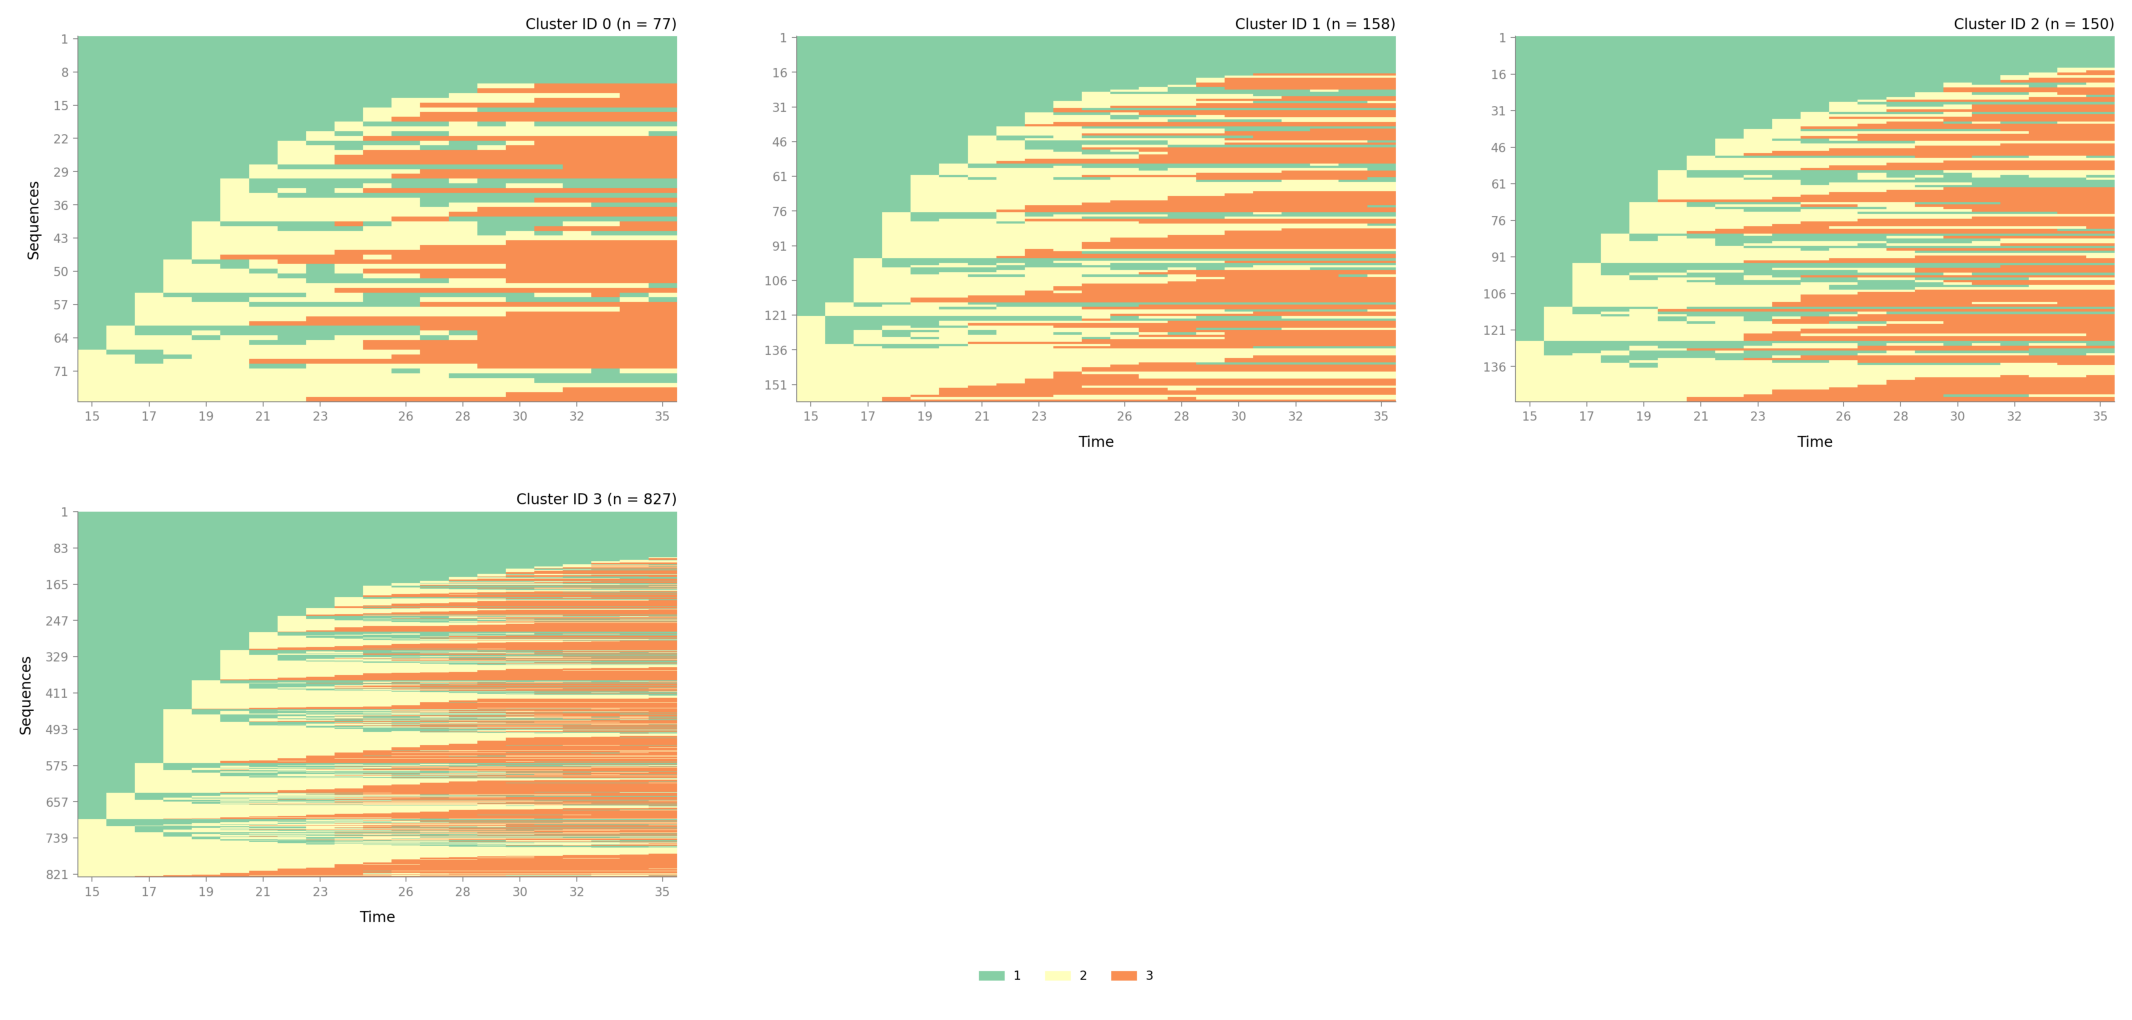

In [62]:
plot_sequence_index(seqdata=family_sequence,
                    id_group_df=cluster_df,
                    categories='Cluster ID',
                    save_as='cluster_index_plot_family')

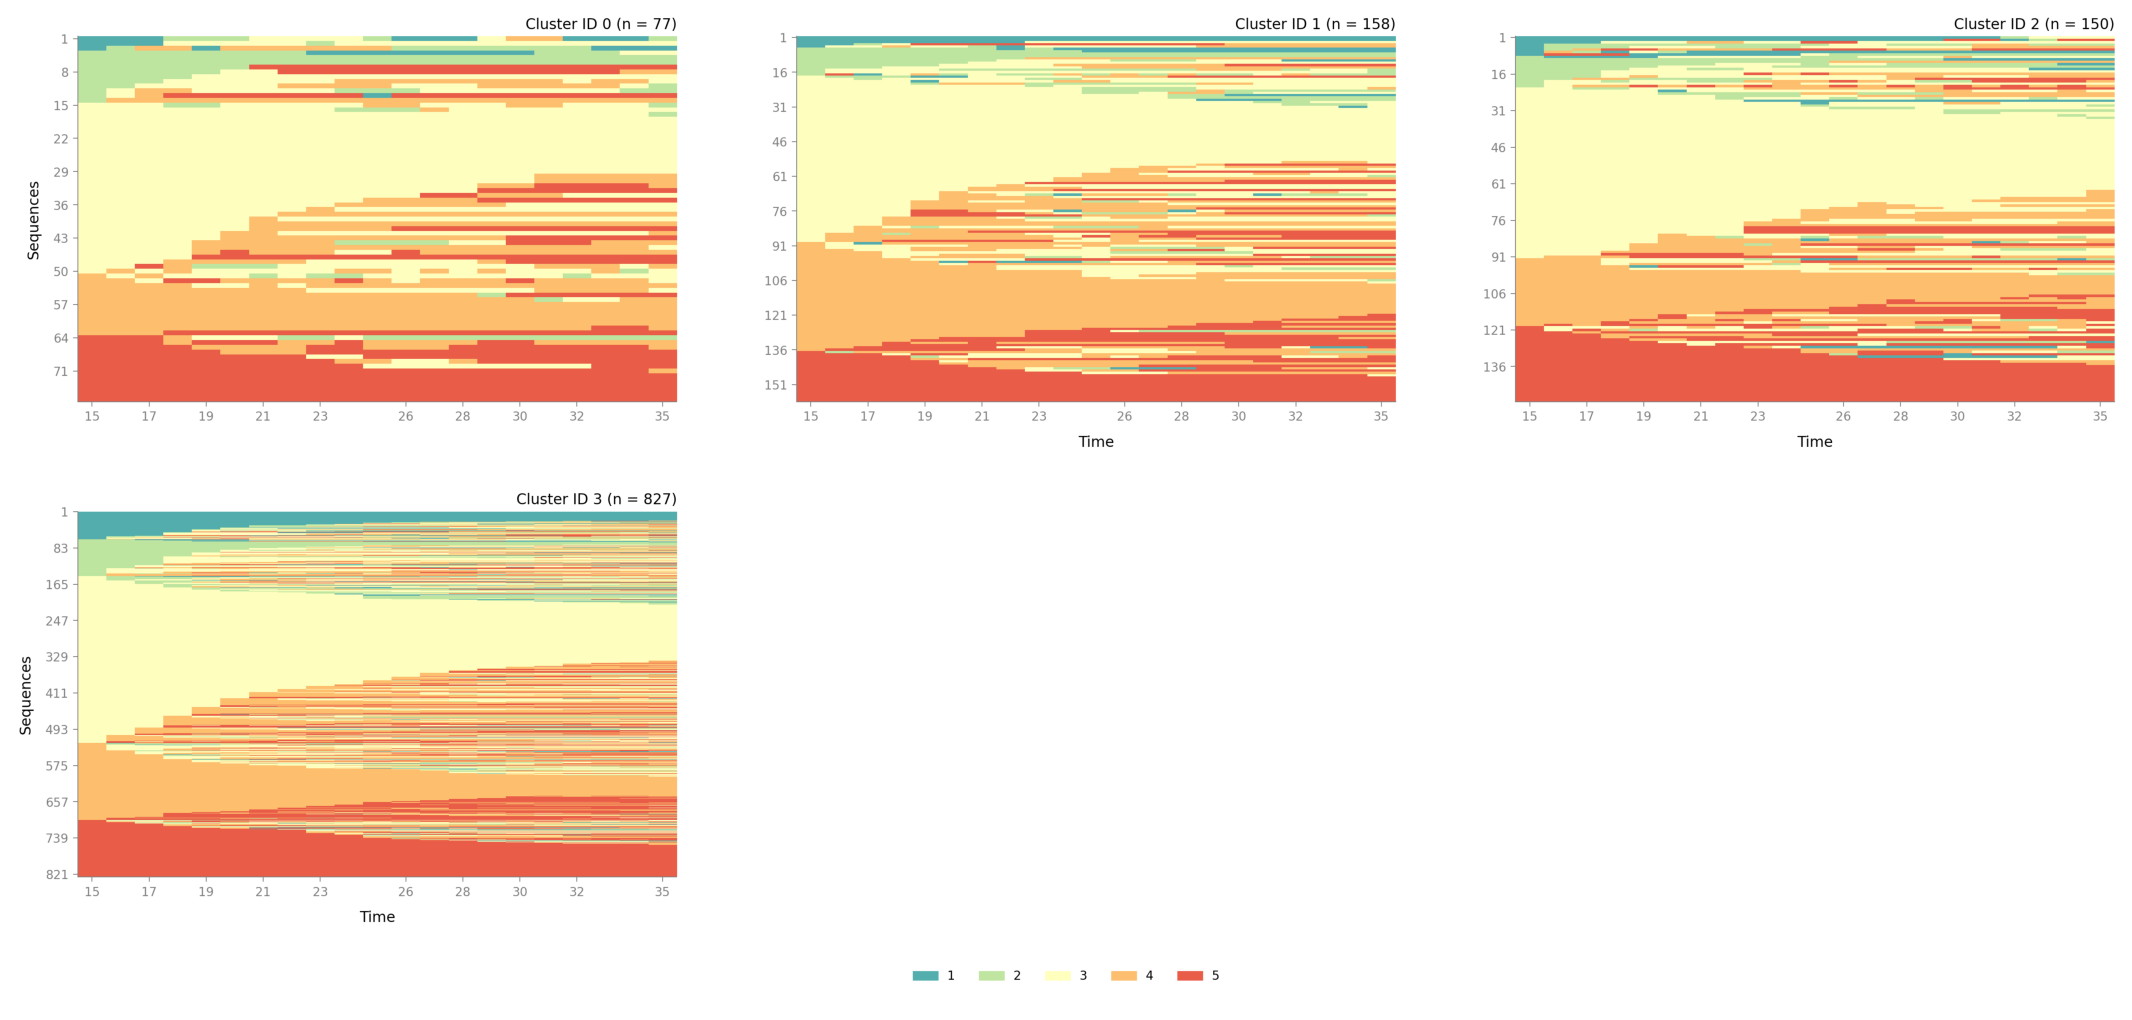

In [64]:
plot_sequence_index(seqdata=happiness_sequence,
                    id_group_df=cluster_df,
                    categories='Cluster ID',
                    save_as='cluster_index_plot_happiness')

区分度还是不够，分开：

In [14]:
import numpy as np
import pandas as pd
from scipy.stats import entropy

def extract_sequence_features(seqdata) -> pd.DataFrame:
    """
    Extract derived features from a SequenceData object for each individual sequence.

    Features include:
    - num_unique_states: Number of unique states
    - num_transitions: Number of state changes
    - dominant_ratio: Proportion of the most frequent state
    - entropy: Entropy of the state distribution
    - mean_duration: Average duration of consecutive identical states

    :param seqdata: A SequenceData object with `.values` and `.states` attributes.
    :return: A pandas DataFrame with shape (n_sequences, n_features)
    """
    sequences = seqdata.values
    features = []

    for seq in sequences:
        seq = seq[~np.isnan(seq)]  # Remove NaNs if any
        if len(seq) == 0:
            features.append([0, 0, 0, 0, 0])
            continue

        unique, counts = np.unique(seq, return_counts=True)
        num_unique_states = len(unique)
        dominant_ratio = np.max(counts) / len(seq)
        ent = entropy(counts, base=2)

        transitions = np.sum(seq[:-1] != seq[1:])
        num_transitions = int(transitions)

        durations = []
        current_duration = 1
        for i in range(1, len(seq)):
            if seq[i] == seq[i-1]:
                current_duration += 1
            else:
                durations.append(current_duration)
                current_duration = 1
        durations.append(current_duration)
        mean_duration = np.mean(durations)

        features.append([
            num_unique_states,
            num_transitions,
            dominant_ratio,
            ent,
            mean_duration
        ])

    df = pd.DataFrame(features, columns=[
        "num_unique_states",
        "num_transitions",
        "dominant_ratio",
        "entropy",
        "mean_duration"
    ])
    df.to_csv("derived_sequence_features.csv", index=False)
    print("DataFrame 已保存为 derived_sequence_features.csv")
    return df


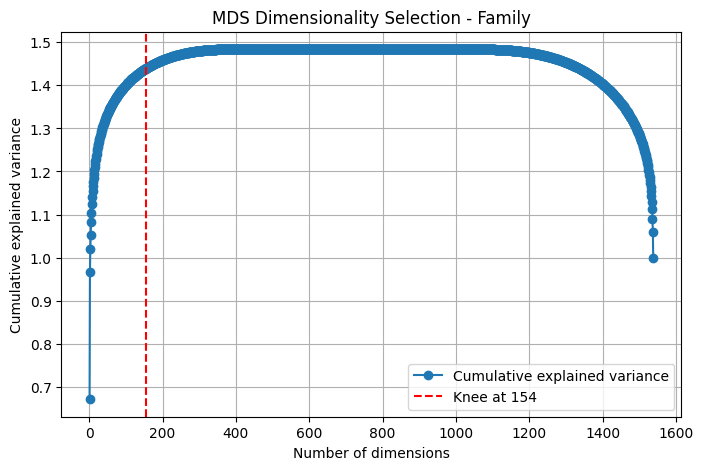

Optimal number of dimensions: 154


ModuleNotFoundError: No module named 'ace_tools'

In [10]:
# Step 1: Classic MDS
X_mds, eigvals = cmdscale(distance_matrix_family)

# Step 2: 解释方差计算
explained_ratio = eigvals / eigvals.sum()
cum_explained = np.cumsum(explained_ratio)

# Step 3: 找膝点维度（你可以替换为自动选维函数 find_optimal_mds_dimension）
knee = find_mds_knee_point(cum_explained, title='MDS Dimensionality Selection - Family')
print(f"Optimal number of dimensions: {knee}")

# Step 4: 截取前 knee 维
X_mds_optimal = X_mds[:, :knee]

# Step 5: 提取派生特征
feature_df = extract_sequence_features(family_sequence)  # 传入 SequenceData 对象

# Step 6: 拼接 MDS 和特征矩阵
X_combined = np.hstack([X_mds_optimal, feature_df.values])

print("Combined feature shape:", X_combined.shape)


* 每个 domain 单独建模（保留结构差异）；

* 拼接 MDS + 派生特征，既包含序列形状（MDS）又包含行为风格（节奏/切换）；

* multi-view 聚类：自动学习哪些 view 更重要，同时在 latent space 聚合共性；

* 这是相对传统拼接更合理的 multidomain 聚类方式，而非对单一 domain 做高级提炼。



In [15]:
# 1. 对 family domain
X_family_mds, _ = cmdscale(distance_matrix_family)
X_family_mds_opt = X_family_mds[:, :knee]  # 选维
X_family_feat = extract_sequence_features(family_sequence).values
X_family = np.hstack([X_family_mds_opt, X_family_feat])  # 拼接后输出 (n, d1)

# 2. 对 happiness domain
X_happy_mds, _ = cmdscale(distance_matrix_happiness)
X_happy_mds_opt = X_happy_mds[:, :knee]
X_happy_feat = extract_sequence_features(happiness_sequence).values
X_happiness = np.hstack([X_happy_mds_opt, X_happy_feat])  # 输出 (n, d2)

# 3. 两个 domain 合成多视角输入（供 Multi-view clustering 使用）
views = [X_family, X_happiness]


DataFrame 已保存为 derived_sequence_features.csv
DataFrame 已保存为 derived_sequence_features.csv


In [19]:
labels, probs = multi_view_soft_gmm_clustering(views, n_clusters=4)

In [20]:
cluster_df = pd.DataFrame({
    "ID": family_df['ID'],   # 替换为你对应的 ID 列
    "Cluster ID": labels
})

cluster_df

,ID,Cluster ID
0,1,1
1,2,1
2,5,1
3,6,1
4,7,1
...,...,...
1533,1992,1
1534,1995,1
1535,1996,1
1536,1997,1


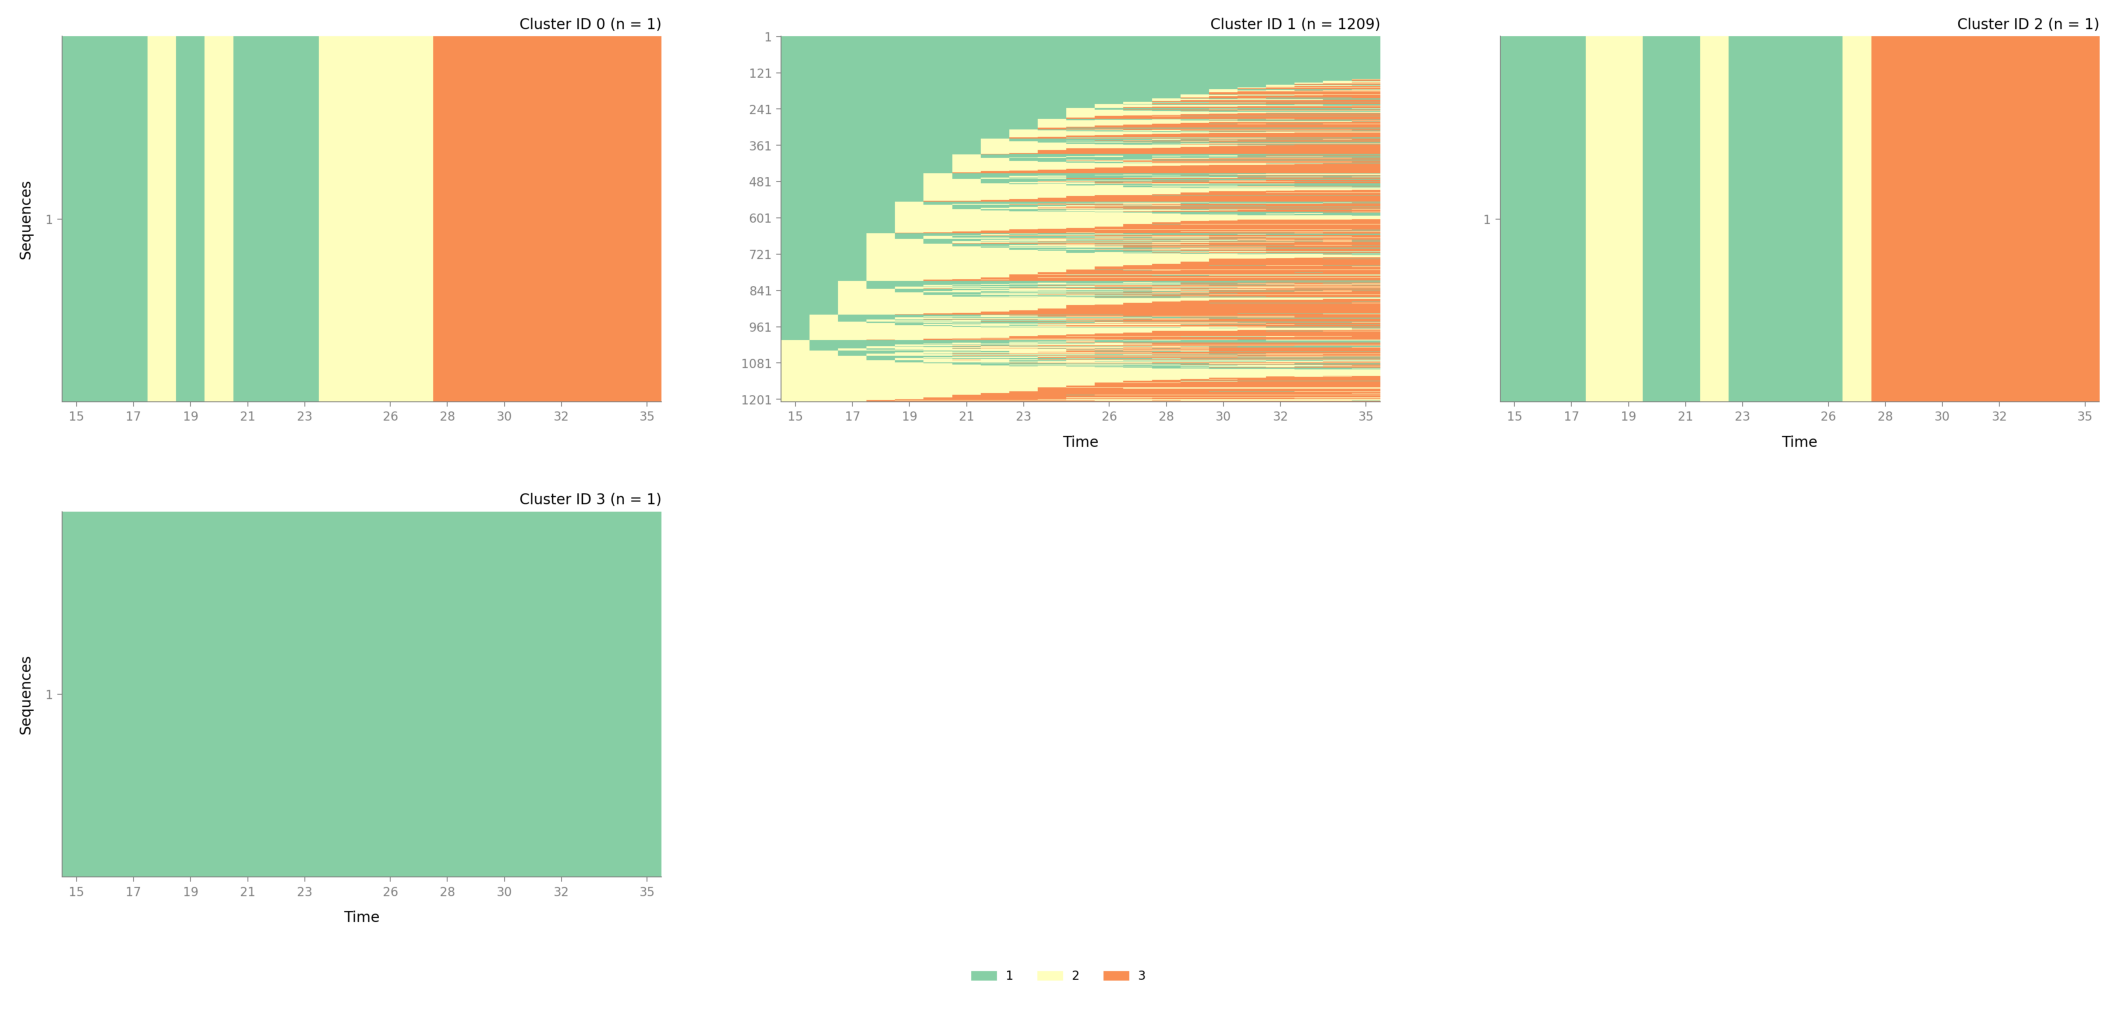

In [21]:
plot_sequence_index(seqdata=family_sequence,
                    id_group_df=cluster_df,
                    categories='Cluster ID',
                    save_as='cluster_index_plot_family')